In [1]:
# Importing packages for Data Processing
import numpy as np
import pandas as pd

# Importing packages for Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import seaborn as sns

# Importing package for warnings
import warnings

# # Importing packages for Deep Learning
import tensorflow as tf
from sklearn.model_selection import KFold



In [2]:
# Sending a random seed for numpy and tensorflow
np.random.seed(321)
tf.random.set_seed(321)

In [3]:
# Loading the data from the dataset and returning df_result
df_metadata = pd.read_csv("metadata.csv")

def load_data(name):
    
    filename = df_metadata[df_metadata['Coin Pair Name'] == name]['File Path'].values[0]
    path = f"data/{filename}"
    
    df_result = pd.read_csv(path)
    
    return df_result

In [4]:
# Loading Coin name "Dogecoin USD" from the function above
df_ETH = load_data("Dogecoin USD")
df_ETH.head()

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,Dogecoin USD,DOGE-USD,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,Dogecoin USD,DOGE-USD,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,Dogecoin USD,DOGE-USD,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,Dogecoin USD,DOGE-USD,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,Dogecoin USD,DOGE-USD,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [5]:
# Printing the info of the selected dataset features

df_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2160 non-null   object 
 1   Symbol     2160 non-null   object 
 2   Date       2160 non-null   object 
 3   Open       2160 non-null   float64
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Close      2160 non-null   float64
 7   Adj Close  2160 non-null   float64
 8   Volume     2160 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 152.0+ KB


In [6]:
# Converting Date dtype to DATETIME
df_ETH["Date"] = pd.to_datetime(df_ETH["Date"])

# Printing the dataset info to check 
df_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2160 non-null   object        
 1   Symbol     2160 non-null   object        
 2   Date       2160 non-null   datetime64[ns]
 3   Open       2160 non-null   float64       
 4   High       2160 non-null   float64       
 5   Low        2160 non-null   float64       
 6   Close      2160 non-null   float64       
 7   Adj Close  2160 non-null   float64       
 8   Volume     2160 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 152.0+ KB


In [7]:
# Checking for any missing values
df_ETH.isnull().sum()

Name         0
Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Rounded the fractions to 3 digits
df_ETH.describe().round(3)

,Date,Open,High,Low,Close,Adj Close,Volume
count,2160,2160.000,2160.000,2160.000,2160.000,2160.000,2.160000e+03
mean,2020-10-23 12:00:00,0.062,0.066,0.059,0.062,0.062,9.372490e+08
min,2017-11-09 00:00:00,0.001,0.001,0.001,0.001,0.001,1.431720e+06
25%,2019-05-02 18:00:00,0.003,0.003,0.003,0.003,0.003,3.642795e+07
50%,2020-10-23 12:00:00,0.006,0.006,0.006,0.006,0.006,1.648614e+08
75%,2022-04-16 06:00:00,0.080,0.083,0.078,0.080,0.080,6.230677e+08
max,2023-10-08 00:00:00,0.688,0.738,0.608,0.685,0.685,6.941068e+10
std,NaN,0.092,0.099,0.085,0.092,0.092,3.248834e+09


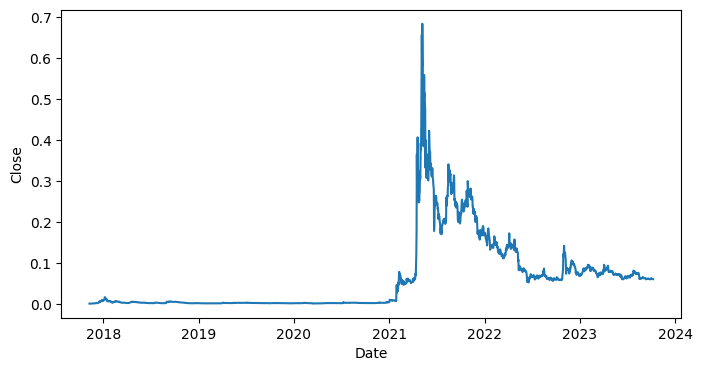

In [9]:
# Creating a graph that shows the close price for the coin
plt.figure(figsize = (8, 4), facecolor = "white")

sns.lineplot(
    data = df_ETH,
    x = "Date", y = "Close"
)

plt.show()

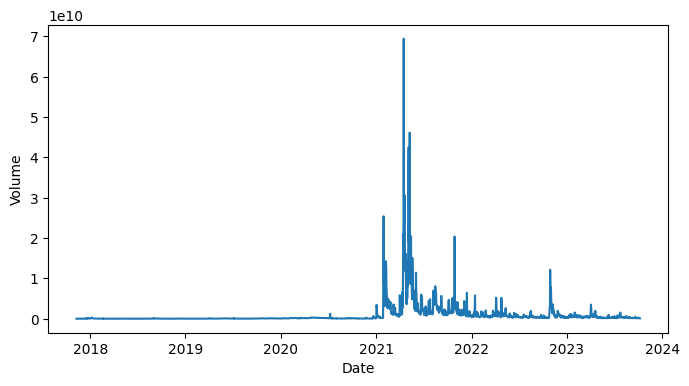

In [10]:
# # Creating a graph that shows the volume of trading for the coin

plt.figure(figsize = (8, 4), facecolor = "white")

sns.lineplot(
    data = df_ETH,
    x = "Date", y = "Volume"
)

plt.show()

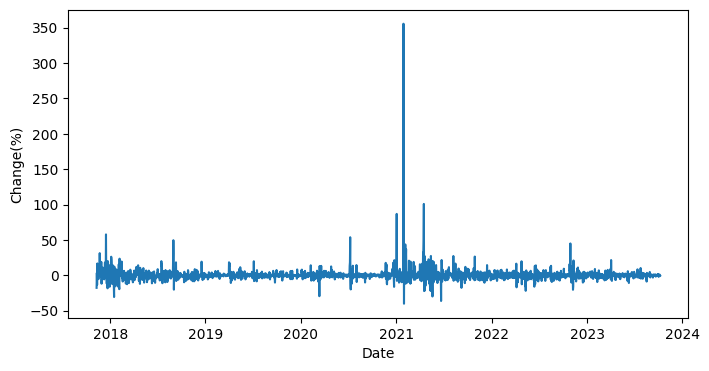

In [11]:
# Creating a graph that shows the percentage of change for the coin
df_ETH["Change(%)"] = (df_ETH["Close"] - df_ETH["Close"].shift(1)) / df_ETH["Close"].shift(1) * 100

plt.figure(figsize = (8, 4), facecolor = "white")

sns.lineplot(
    data = df_ETH,
    x = "Date", y = "Change(%)"
)

plt.show()

In [12]:
df_ETH_transformed = pd.DataFrame()

In [13]:
df_ETH_transformed['Date'] = df_ETH['Date']

# Log transformation and checking
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df_ETH_transformed[col] = np.log1p(df_ETH[col])


In [14]:
df_ETH_transformed.set_index('Date', inplace = True)
df_ETH_transformed.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,0.001206,0.001414,0.001180,0.001414,15.649619
2017-11-10,0.001420,0.001430,0.001124,0.001162,15.261611
2017-11-11,0.001145,0.001256,0.001140,0.001200,14.617997
2017-11-12,0.001188,0.001209,0.001001,0.001037,15.006082
2017-11-13,0.001045,0.001211,0.001018,0.001210,14.724281


In [15]:
# Imported MinMaxScaler from sklearn preprocessing  
# for Standardizing the features in a given range

from sklearn.preprocessing import MinMaxScaler

scaler_not_y = MinMaxScaler()
scaler_y = MinMaxScaler()

In [16]:
# Scaling the data 
def scale_data(data):

    arr_not_y = scaler_not_y.fit_transform(data.drop(['Close'], axis = 1).values)
    arr_y = scaler_y.fit_transform(data['Close'].values.reshape(-1, 1))

    arr_result = np.concatenate([arr_y, arr_not_y], 1)
    
    return arr_result

In [17]:
arr_ETH_transformed = scale_data(df_ETH_transformed)

In [18]:
# Creating Sequences of data using the data of past days and close of the next day
def create_sequences(data, seq_length):
    X, y = [], []
    
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length]) # data of past days
        y.append(data[i + seq_length][0]) # 'Close' of next day
        
    return np.array(X), np.array(y)
  

In [19]:
seq_length = 10  # Number of past days to be used for prediction
X, y = create_sequences(arr_ETH_transformed, seq_length)

In [20]:

# Splitting the data into training and testing and the ratio for training is 0.7 and KFold

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_size = int(len(X) * 0.70)  # 0.70
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 538  539  540 ... 2147 2148 2149] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [21]:
# Importing Keras , Sequential , LSTM , Dense 
from tensorflow import keras
from keras import Sequential
from keras.layers import LSTM, Dense

In [22]:
# Sequential LSTM Model , 4 LSTM LAYERS , 64 UNITS IN FIRST TWO LAYERS , 32 UNITS IN THE LAST TWO LAYERS  , TWO DENSE LAYERS 

# Activation Function ReLu , Optimizer Adam , Loss function Mean Squared Error
model_LSTM = Sequential([
    LSTM(units=64, activation='relu', return_sequences=True, input_shape=(seq_length, 5)),
    LSTM(units=64, activation='relu', return_sequences=True),
    LSTM(units=32, activation='relu', return_sequences=True),
    LSTM(units=32, activation='relu', return_sequences=False),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])

model_LSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the Model data for 64 epochs and batch size of 64
model_LSTM_history = model_LSTM.fit(
    X_train, y_train,
    epochs = 64,
    batch_size = 64,
    validation_data = (X_test, y_test)
)


Epoch 1/64
26/26 [==============================] - 4s 26ms/step - loss: 0.0196 - val_loss: 0.0013
Epoch 2/64
26/26 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 3.4506e-04
Epoch 3/64
26/26 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 4/64
26/26 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 5.0795e-04
Epoch 5/64
26/26 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 6/64
26/26 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 8.9039e-04
Epoch 7/64
26/26 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8/64
26/26 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 7.0784e-04
Epoch 9/64
26/26 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 5.3195e-04
Epoch 10/64
26/26 [==============================] - 0s 11ms/step - loss: 0.0018 - val_lo

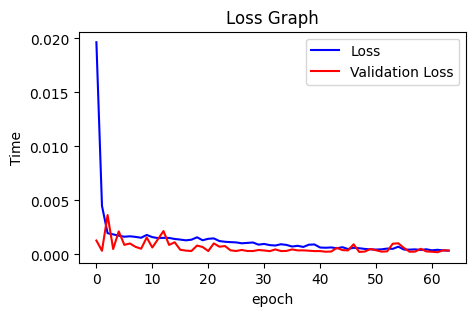

In [24]:
# Plotting the Loss Graph for the loss and validation loss 
plt.figure(figsize = (5, 3))

plt.plot(model_LSTM_history.history['loss'], color = "blue")
plt.plot(model_LSTM_history.history['val_loss'], color = "red")

plt.xlabel("epoch")
plt.legend(['Loss','Validation Loss'])
plt.title("Loss Graph")
plt.ylabel("Time")

plt.show()

In [25]:
# Prediction
y_pred = np.concatenate([model_LSTM.predict(X_train), model_LSTM.predict(X_test)])
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_pred_rescaled = np.expm1(y_pred_rescaled)

17/17 [==============================] - 0s 3ms/step


In [26]:
# inverse scaling: actual y
y_rescaled = np.expm1(scaler_y.inverse_transform(y.reshape(-1, 1)))

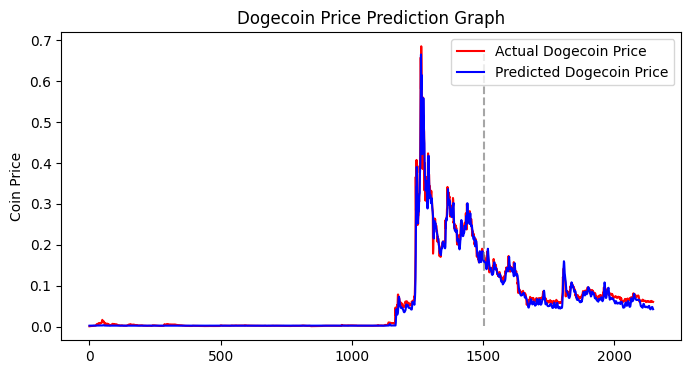

In [27]:
# Plotting the data into a graph 
# The graph shows the actual price of the coin from the dataset and the predicted price
plt.figure(figsize = (8, 4), facecolor = "white")

plt.plot(y_rescaled, color = "red")
plt.plot(y_pred_rescaled, color = "blue")
plt.vlines(
    train_size,
    ymin = y_pred_rescaled.min(), ymax = y_pred_rescaled.max(),
    color = "grey",
    linestyle = "--",
    alpha = 0.7
)
plt.title("Dogecoin Price Prediction Graph")
plt.legend(['Actual Dogecoin Price','Predicted Dogecoin Price'])
plt.ylabel("Coin Price")

plt.show() 

In [28]:
#Printing the accuracy
from sklearn.metrics import r2_score

#Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_rescaled, y_pred_rescaled)

#Convert R-squared to percentage
accuracy_percentage = r_squared * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 98.25%


In [29]:
#Printing the model's summary
print(model_LSTM.summary(64))

Model: "sequential"
________________________________________________________________
 Layer (type)               Output Shape              Param #   
 lstm (LSTM)                (None, 10, 64)            17920     
                                                                
 lstm_1 (LSTM)              (None, 10, 64)            33024     
                                                                
 lstm_2 (LSTM)              (None, 10, 32)            12416     
                                                                
 lstm_3 (LSTM)              (None, 32)                8320      
                                                                
 dense (Dense)              (None, 16)                528       
                                                                
 dense_1 (Dense)            (None, 1)                 17        
                                                                
Total params: 72225 (282.13 KB)
Trainable params: 72225 (282.13 KB)
No